In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
#Data collection and Processing
car_dataset = pd.read_csv('cardataLassoReg.csv')

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_dataset.shape

(301, 9)

In [11]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [19]:
#Encoding the categorical data

#Encoding '''Fuel_Type''' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)

#Encoding  '''Seller_Type''' column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding  '''Transmission''' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

C:\Users\sarfr\AppData\Local\Temp\ipykernel_14292\1716675530.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\sarfr\AppData\Local\Temp\ipykernel_14292\1716675530.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
#Training and Testing

X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis =1)
y = car_dataset['Selling_Price']

In [27]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=2)


In [35]:
#training model
lin_reg = LinearRegression()

In [37]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
#Model Evaluation
training_data_pred = lin_reg.predict(X_train)


In [41]:
#R square error
error_score = metrics.r2_score(y_train,training_data_pred)
print('R Squared Error: ', error_score)

R Squared Error:  0.8799451660493716


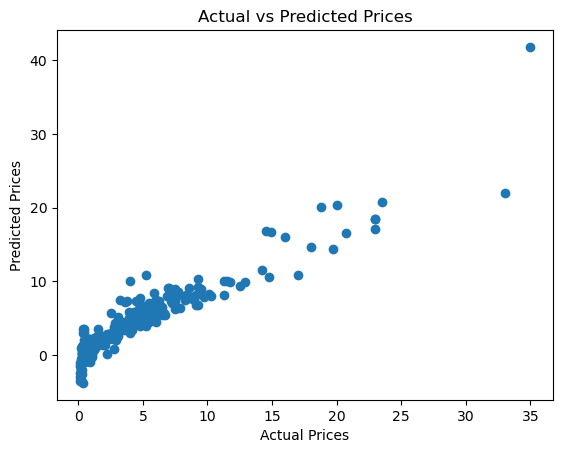

In [43]:
#Visualizing the Acutal vs Predicted Prices
plt.scatter(y_train,training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [45]:
testing_data_pred = lin_reg.predict(X_test)

In [47]:
error_sc = metrics.r2_score(y_test, testing_data_pred)
print('R2 score for Testing data: ', error_sc)

R2 score for Testing data:  0.836576671502587


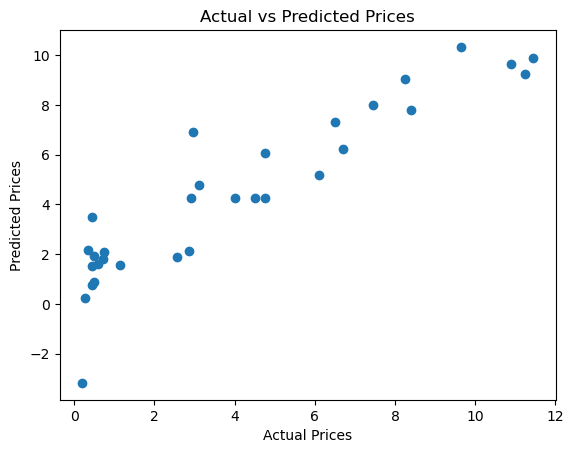

In [49]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [51]:
#2. Lasso Regression
lasso_reg = Lasso()

In [53]:
lasso_reg.fit(X_train,y_train)

Lasso()

In [55]:
training_data_pred = lasso_reg.predict(X_train)

In [57]:
#R square error
error_score = metrics.r2_score(y_train,training_data_pred)
print('R Squared Error: ', error_score)

R Squared Error:  0.8427856123435794


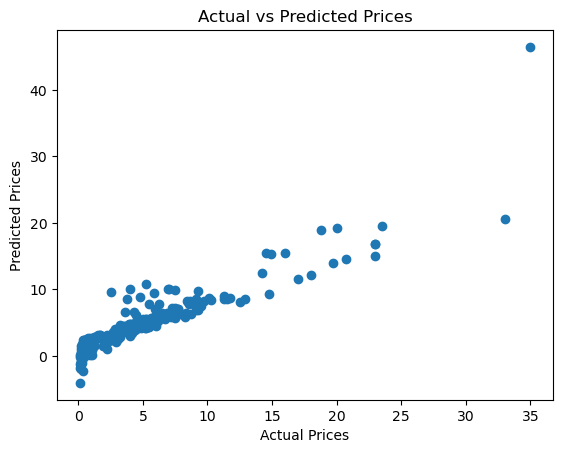

In [59]:
#Visualizing the Acutal vs Predicted Prices
plt.scatter(y_train,training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [61]:
testing_data_pred = lasso_reg.predict(X_test)

In [63]:
error_sc = metrics.r2_score(y_test, testing_data_pred)
print('R2 score for Testing data: ', error_sc)

R2 score for Testing data:  0.8709167941173195


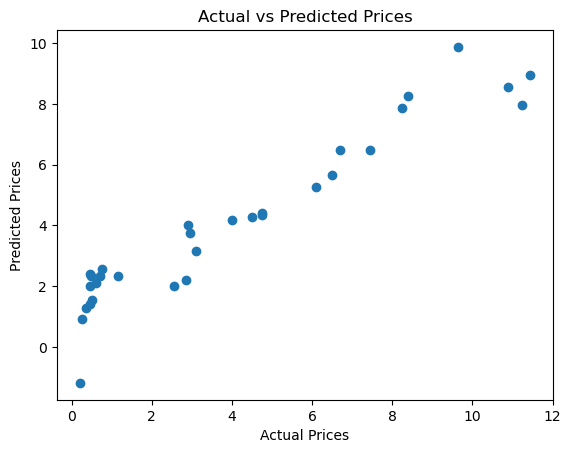

In [65]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()